<a href="https://colab.research.google.com/github/sudarshansb143/Machine-Learning-Models/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import (
    model_selection, 
    linear_model,
    ensemble,
    tree
)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws
ws.filterwarnings("ignore")

In [ ]:
# Loading the data
url = ("http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls" )

In [ ]:
df = pd.read_excel(url)

In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# Most models asssumes the data should be numeric or the float in the training and the testing hence we should clean it

In [ ]:

df.shape

(1309, 14)

In [ ]:
df.describe()


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
df.drop(columns=["cabin", "boat", "body", "home.dest", "name"], inplace= True )

In [ ]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,female,29.0000,0,0,24160,211.3375,S
1,1,1,male,0.9167,1,2,113781,151.5500,S
2,1,0,female,2.0000,1,2,113781,151.5500,S
3,1,0,male,30.0000,1,2,113781,151.5500,S
4,1,0,female,25.0000,1,2,113781,151.5500,S


In [ ]:
df.drop(columns="ticket", inplace = True)

In [ ]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [ ]:
df.isna().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [ ]:
frame = pd.get_dummies(df, drop_first = True)

In [ ]:
X = frame.drop(columns="survived")
y = frame["survived"]

In [ ]:
X.shape

(1309, 8)

In [ ]:
X.isna().sum()

pclass          0
age           263
sibsp           0
parch           0
fare            1
sex_male        0
embarked_Q      0
embarked_S      0
dtype: int64

In [ ]:



# sampling the data 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
# imputing the features

In [ ]:
X_train.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
999,3,NaN,0,0,7.7500,0,1,0
392,2,24.0,1,0,27.7208,0,0,0
628,3,11.0,4,2,31.2750,0,0,1
1165,3,25.0,0,0,7.2250,1,0,0
604,3,16.0,0,0,7.6500,0,0,1


In [ ]:
from sklearn.experimental import enable_iterative_imputer

In [ ]:
from sklearn import impute

In [ ]:
X_train.dtypes

pclass          int64
age           float64
sibsp           int64
parch           int64
fare          float64
sex_male        uint8
embarked_Q      uint8
embarked_S      uint8
dtype: object

In [ ]:
imputer = impute.IterativeImputer()

In [ ]:
num_col = ["pclass", "sibsp", "fare", "parch", "age"]
imputed = imputer.fit_transform(X_train[num_col])

In [ ]:
X_train.loc[:, num_col] = imputed
test_imputed = imputer.transform(X_test[num_col])
X_test.loc[:, num_col] = test_imputed

In [ ]:
# Data imputer Properly
X_train.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
999,3.0,26.891696,0.0,0.0,7.7500,0,1,0
392,2.0,24.000000,1.0,0.0,27.7208,0,0,0
628,3.0,11.000000,4.0,2.0,31.2750,0,0,1
1165,3.0,25.000000,0.0,0.0,7.2250,1,0,0
604,3.0,16.000000,0.0,0.0,7.6500,0,0,1


In [ ]:
X_train.isna().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

In [ ]:

X_test.isna().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

In [ ]:
# Normalization is quite good for the distance based models and other several once 
# The normalizing tends to performe good
# pretend to scale the  indicator variable

In [ ]:
from sklearn.preprocessing import StandardScaler
col = ["pclass", "parch", "fare", "age"]
scaler = StandardScaler()
scaled_values = scaler.fit_transform(X_train[col])
X_train.loc[:, col] = scaled_values

In [ ]:
scaled_test = scaler.transform(X_test[col])
X_test.loc[:, col] = scaled_test

In [ ]:
X_train.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
999,0.824891,-0.166197,0.0,-0.447597,-0.498878,0,1,0
392,-0.377979,-0.384041,1.0,-0.447597,-0.090309,0,0,0
628,0.824891,-1.363386,4.0,1.872374,-0.017596,0,0,1
1165,0.824891,-0.308707,0.0,-0.447597,-0.509618,1,0,0
604,0.824891,-0.986715,0.0,-0.447597,-0.500924,0,0,1


In [ ]:
X_test.isna().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

In [ ]:
%matplotlib inline 

In [ ]:
# Fitting the dummy classifier
from sklearn.dummy import DummyClassifier
dum = DummyClassifier()
dum.fit(X_train, y_train)
print("Training Score", dum.score(X_train, y_train))

Training Score 0.5224450811843362


In [ ]:
from sklearn import metrics
metrics.precision_score(y_test, dum.predict(X_test)) 

0.34

In [ ]:
X_train_full = pd.concat([X_train, X_test])
X_test_full = pd.concat([y_train, y_test])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
import xgboost

In [ ]:
models = [
              DummyClassifier,
              LogisticRegression,
              DecisionTreeClassifier,
              RandomForestClassifier,
              KNeighborsClassifier,
              GaussianNB,
              SVC,
              xgboost.XGBClassifier
]
for model in models:
  cls = model()
  kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
  score = model_selection.cross_val_score(cls, X_train_full, X_test_full, cv =kfold)
  print(
      f"{model.__name__:22} AUC: "
      f"{score.mean():.3f} STD:{score.std(): .2f}"
  )

DummyClassifier        AUC: 0.533 STD: 0.07
LogisticRegression     AUC: 0.795 STD: 0.02
DecisionTreeClassifier AUC: 0.755 STD: 0.03
RandomForestClassifier AUC: 0.791 STD: 0.03
KNeighborsClassifier   AUC: 0.784 STD: 0.04
GaussianNB             AUC: 0.778 STD: 0.03
SVC                    AUC: 0.809 STD: 0.03
XGBClassifier          AUC: 0.812 STD: 0.02


In [ ]:
# Stacking the classifier
from mlxtend.classifier import StackingClassifier

In [ ]:
clf = [i() for i in [LogisticRegression, GaussianNB, DecisionTreeClassifier, KNeighborsClassifier, SVC, RandomForestClassifier]]

In [ ]:
stack = StackingClassifier(
    classifiers = clf,
    meta_classifier = LogisticRegression()
)

In [ ]:
score_stacking = model_selection.cross_val_score(stack, X_train_full, X_test_full, scoring = "roc_auc", cv = kfold)

In [ ]:
print(
      f"{stack.__class__.__name__:22} AUC: "
      f"{score_stacking.mean():.3f} STD:{score_stacking.std(): .2f}"
  )

StackingClassifier     AUC: 0.762 STD: 0.06


In [ ]:
# We are going to finalize the results with the RandomForest model
rfe1 = RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
rfe1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
print("Train_score ", rfe1.score(X_train, y_train))

Train_score  0.9694364851957975


In [ ]:
score_rfe = model_selection.cross_val_score(rfe1, X_train, y_train, cv = kfold)
print(score * 100)
print(round (score.mean()*100, 2))

[80.15267176 82.44274809 78.6259542  83.20610687 80.91603053 83.20610687
 82.44274809 81.67938931 80.15267176 79.23076923]
81.21


In [ ]:
print("Testing Score", rfe1.score(X_test, y_test) * 100)

Testing Score 78.62595419847328


In [ ]:
# probably the model is overfitting to the training data

In [ ]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logit.score(X_train, y_train)

0.7870105062082139

In [ ]:
logit.score(X_test, y_test)

0.8244274809160306

In [ ]:
# The Logistic Regression models works good here lets evaluate it
print(metrics.classification_report(y_test, logit.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       162
           1       0.79      0.73      0.76       100

    accuracy                           0.82       262
   macro avg       0.82      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262



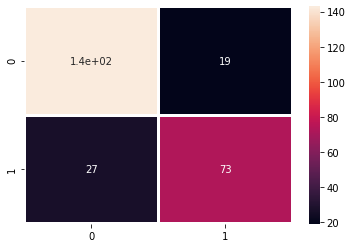

In [ ]:
conf = metrics.confusion_matrix(y_test, logit.predict(X_test))
sns.heatmap(conf, annot = True, linewidths = 2, fmt = ".2g")
plt.show()

In [ ]:
print (conf)

[[143  19]
 [ 27  73]]
